In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob, inspect, sys
from sksurv.nonparametric import kaplan_meier_estimator 


In [129]:
data = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/Survival_df.csv'),
                  index_col=0)

In [130]:
data_x = data.iloc[:, 2:]
data_y = data.iloc[:, 0:2]

In [131]:
data_y.head()

,Observed,F_Time
ID,,
41C,True,2154137.0
44C,True,1318034.0
45C,False,3245267.0
19C,True,464392.0
32C,True,306142.0


Text(0.5, 0, 'time $t$')

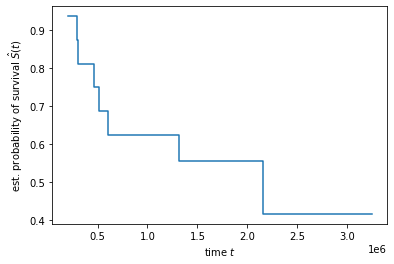

In [69]:
time, survival_prob = kaplan_meier_estimator(data_y["Observed"], data_y["F_Time"])
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

In [70]:
data_x.columns

Index(['NDE_cyle', 'diff_two_peaks_ratio', 'amp_ratio', 'pos_ratio',
       'energy_ratio', 'NLE_ratio_51_17', 'NLE_ratio_85_17',
       'NLE_ratio_119_17', 'NLO_avg', 'Avg_RP', 'ACEE_30_Avg_58',
       'ACEE_500_Avg_58', 'ACPD_Avg_58'],
      dtype='object')

In [71]:
data_x["NDE_cyle"] == 0

ID
41C     True
44C     True
45C     True
19C    False
32C    False
23C    False
25C    False
21C    False
27C    False
26C    False
28C    False
48C    False
37C    False
39C    False
42C    False
49C    False
Name: NDE_cyle, dtype: bool

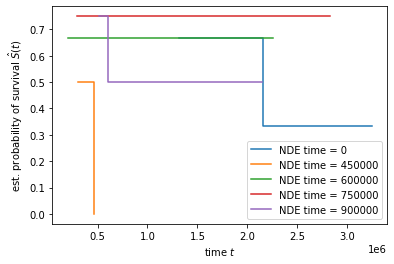

In [72]:
for age in [0, 450000, 600000, 750000, 900000]:
    mask_treat = data_x["NDE_cyle"] == age
    time_age, survival_prob_age = kaplan_meier_estimator(
        data_y["Observed"][mask_treat],
        data_y["F_Time"][mask_treat])

    plt.step(time_age, survival_prob_age, where="post",
             label="NDE time = %s" % age)

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

In [140]:
data_y_num = data_y.to_records(index=False)

In [147]:
data_y_num

rec.array([( True, 2154137.), ( True, 1318034.), (False, 3245267.),
           ( True,  464392.), ( True,  306142.), (False, 2255225.),
           (False, 1444844.), ( True,  200007.), ( True,  297627.),
           (False, 2829121.), (False, 1537912.), (False, 1266052.),
           ( True,  514878.), (False, 2101992.), ( True,  603724.),
           (False, 2143805.)],
          dtype=[('Observed', '?'), ('F_Time', '<f8')])

In [148]:
data_y_num.shape

(16,)

In [169]:
from sksurv.linear_model import CoxPHSurvivalAnalysis

estimator = CoxPHSurvivalAnalysis(alpha=0.0000001, verbose=10)
estimator.fit(data_x, data_y_num)

iter      1: update = [-6.90335723e-07 -1.50720962e+01 -5.71965532e+00  3.79608788e+02
  4.47406811e+01 -2.25970860e+02  6.53804117e+00  2.10062027e+02
  4.30278719e+00  8.72098113e-02 -1.18834586e+01 -1.85058159e+00
 -1.10243782e+00]
iter      1: loss = 0.2735597685
iter      2: update = [ 2.30973962e-06 -7.59884518e+00 -1.48560947e+00  1.03301956e+02
  2.18370498e+01 -1.00460818e+02 -2.21758986e+01  1.17462418e+02
  2.07353166e+00  1.78885810e-01 -5.70364588e+00 -9.66000158e-01
 -9.58197158e-01]
iter      2: loss = 0.1125178944
iter      3: update = [ 1.41500428e-06 -9.80092495e+00 -2.46558052e+00  1.73381178e+02
  2.85218263e+01 -1.33098446e+02 -1.62310398e+01  1.57417909e+02
  2.79702030e+00  1.70572751e-01 -6.71284457e+00 -1.17736866e+00
 -1.21511752e+00]
iter      3: loss = 0.0492022581
iter      4: update = [ 4.18472744e-06 -6.48250676e+00 -6.76975695e+00  5.77462558e+01
  2.84062201e+01 -8.13235180e+01 -4.10581736e+01  1.27689293e+02
  2.41567606e+00 -3.03996669e-02 -5.40695337

/home/marie-anne/anaconda3/envs/EPRI/lib/python3.8/site-packages/sksurv/linear_model/coxph.py:425: LinAlgWarning: Ill-conditioned matrix (rcond=4.66688e-17): result may not be accurate.
  delta = solve(optimizer.hessian, optimizer.gradient,
/home/marie-anne/anaconda3/envs/EPRI/lib/python3.8/site-packages/sksurv/linear_model/coxph.py:425: LinAlgWarning: Ill-conditioned matrix (rcond=7.93774e-18): result may not be accurate.
  delta = solve(optimizer.hessian, optimizer.gradient,
/home/marie-anne/anaconda3/envs/EPRI/lib/python3.8/site-packages/sksurv/linear_model/coxph.py:425: LinAlgWarning: Ill-conditioned matrix (rcond=3.88442e-18): result may not be accurate.
  delta = solve(optimizer.hessian, optimizer.gradient,
/home/marie-anne/anaconda3/envs/EPRI/lib/python3.8/site-packages/sksurv/linear_model/coxph.py:425: LinAlgWarning: Ill-conditioned matrix (rcond=2.09751e-18): result may not be accurate.
  delta = solve(optimizer.hessian, optimizer.gradient,
/home/marie-anne/anaconda3/envs/EPRI

CoxPHSurvivalAnalysis(alpha=1e-07, verbose=10)